In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression as LR
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [3]:
data = pd.read_csv('banking.csv')
pd.set_option('display.max_columns', None)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
# yes = 1, no = 0, unknown = 0.5

In [4]:
def change_data(name_column, new_name):
    dig = []
    for value in data[name_column]:
        if value == 'yes':
            dig.append(1)
        if value == 'no':
            dig.append(0)
        if value == 'unknown':
            dig.append(0.5)
    data[new_name] = dig
    

In [5]:
change_data('default', 'default_DIG')

In [6]:
change_data('housing', 'housing_DIG')

In [7]:
change_data('loan', 'loan_DIG')

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'default_DIG',
       'housing_DIG', 'loan_DIG'],
      dtype='object')

In [9]:
x = data[['age', 'duration', 'campaign', 'pdays', 'emp_var_rate', 'previous', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'default_DIG', 'housing_DIG', 'loan_DIG']]

In [10]:
Y = data['y']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3, random_state = 0)

In [12]:
model = LR()

In [13]:
model.fit(x_train, y_train)

C:\Users\akim5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
comprasion = pd.DataFrame({'actual':y_test, 'predict':y_predict})
comprasion

,actual,predict
15500,0,0
29034,0,0
11199,0,0
22247,0,0
27180,0,0
...,...,...
20920,0,0
15744,0,0
34965,0,0
4644,0,0


<AxesSubplot: >

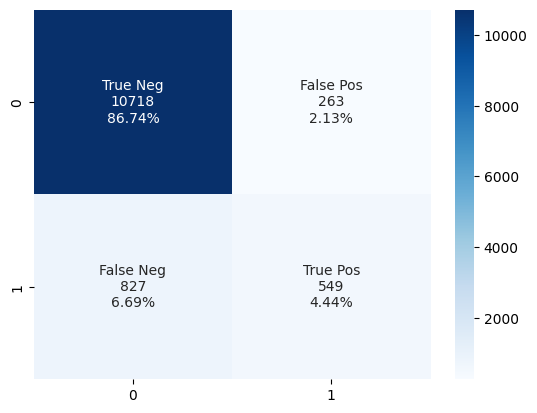

In [16]:
matrix = metrics.confusion_matrix(y_test, y_predict)

group_counts = [f'{value:0.0f}' for value in matrix.flatten()]

group_percentages = [f'{value:.2%}' for value in matrix.flatten()/np.sum(matrix)]

group_names = ['True Neg','False Pos','False Neg','True Pos']

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
# actual --> True/False,   predict --> Positive/Negative

In [17]:
accuracy = metrics.accuracy_score(y_test, y_predict)
precision = metrics.precision_score(y_test, y_predict)
recall = metrics.recall_score(y_test, y_predict)
f1 = metrics.f1_score(y_test, y_predict, average = None)
result = {'accuracy' : accuracy, 'precision' : precision, 'recall' : recall, 'f1': [f1]}

In [18]:
df_result = pd.DataFrame(result)
df_result.T

,0
accuracy,0.911791
precision,0.676108
recall,0.398983
f1,"[0.9516114711888484, 0.5018281535648994]"


In [19]:
y_proba = model.predict_proba(x_test)

In [21]:
y_proba = y_proba[:, 1]

In [29]:
y_roc_auc = roc_auc_score(y_test, y_proba)
y_roc_auc

0.9206606932587577

In [26]:
fpr, tpr, treshold = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

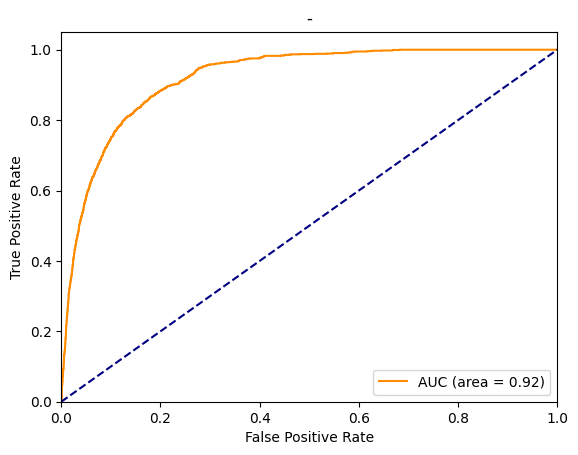

In [28]:
plt.plot(fpr, tpr, color='darkorange',
         label='AUC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('-')
plt.legend(loc="lower right")
plt.show()